<a href="https://colab.research.google.com/github/Yahia0mohamed/ML_projects/blob/main/MNISTproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Classification on MNIST DataSet***
MNIST digits dataset will be utilized. It is a dataset of handwritten numbers from 0 to 9.

# *Loading the `DataSet`*

In [2]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


(x_main, y_main), (x_test, y_test) = mnist.load_data()

# *Prepare the validate segment and applying the `hog features`*

In [3]:
from sklearn.model_selection import train_test_split

from skimage.feature import hog
from skimage import exposure

print("Main data shape:", x_main.shape)
print("Testing data shape:", x_test.shape)

x_train,x_val,y_train,y_val=train_test_split(x_main,y_main,test_size=0.16666666666666666666666666666667,random_state=42)

def apply_hog(data):
    hog_features = []
    for image in data:
        features, hog_image = hog(image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), block_norm='L2-Hys', visualize=True)
        hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
        hog_features.append(features)
    return np.array(hog_features)


# Flatten the images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)
x_val_flat =x_val.reshape(x_val.shape[0], -1)

x_train_hog= apply_hog(x_train)
x_test_hog= apply_hog(x_test)
x_val_hog= apply_hog(x_val)

print("Training data shape:", x_train.shape)
print("Validation data shape:", x_val.shape)

Main data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Training data shape: (50000, 28, 28)
Validation data shape: (10000, 28, 28)


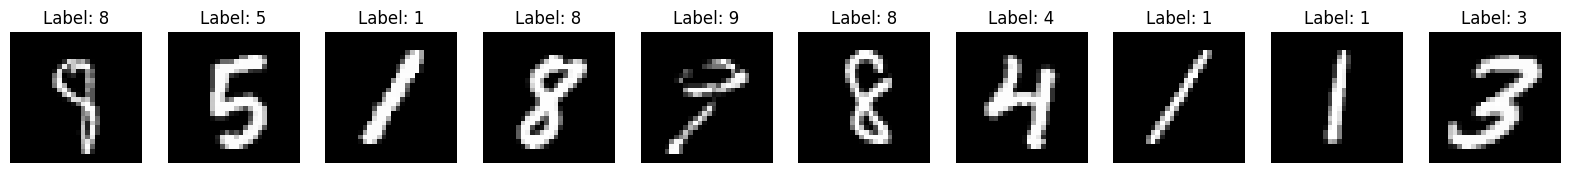

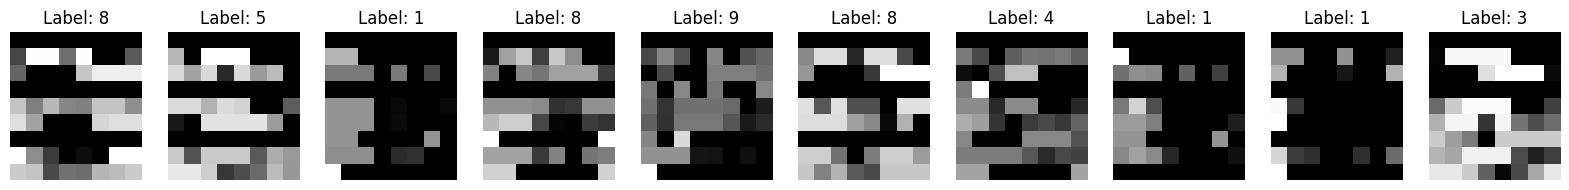

In [4]:
#showing the diffrence
def plot_mnist_images(images, labels, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 2, 2))

    for i in range(num_images):
        axes[i].imshow(images[i].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"Label: {labels[i]}")
        axes[i].axis('off')

    plt.show()

def plot_HOG(images, labels, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 2, 2))

    for i in range(num_images):
       axes[i].imshow(images[i].reshape(9, 8), cmap='gray')
       axes[i].set_title(f"Label: {labels[i]}")
       axes[i].axis('off')

    plt.show()

plot_mnist_images(x_train, y_train)
plot_HOG(x_train_hog,y_train)

# *```KNN``` classifier*

In [5]:
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

#using built in KNN

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train_flat, y_train)

# Validation of the model
y_pred = knn_classifier.predict(x_val_flat)

# Evaluate the accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation accuracy: {accuracy*100}%')

# Validation of the model
y_pred = knn_classifier.predict(x_test_flat)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'test accuracy: {accuracy*100}%')

knnReport=classification_report(y_test, y_pred)
print(knnReport)


Validation accuracy: 97.24000000000001%
test accuracy: 96.89999999999999%
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.93      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
# KNN is K nearest neighbor where k is the radius of the area we are compairing from,
# we claculate the distance using the euclidian rule
# distance = sqrt(((x-a)**2)-((y-b)**2)).

# User made KNN

mini_x_train=x_train_flat[0:(int(len(x_train_flat)/10))]
mini_y_train=y_train[0:(int(len(y_train)/10))]
mini_x_test=x_test_flat[0:(int(len(x_test_flat)/10))]
mini_y_test=y_test[0:(int(len(y_test)/10))]

def KNN(X, Y, T, k=3):
    predList = []
    for x in T:
        # Calculate the Euclidean distance
        distance = np.sqrt(np.sum((X - x)**2, axis=1))
        # Get the indices of the k nearest points
        k_nearest_indices = np.argsort(distance)[:k]
        # Get the labels of these points
        k_nearest_labels = Y[k_nearest_indices]
        # Get the most frequent class in the k nearest labels
        predicted_label = np.bincount(k_nearest_labels).argmax()
        predList.append(predicted_label)
    return predList

predections=KNN(mini_x_train,mini_y_train,mini_x_test,k=6)

from sklearn.metrics import accuracy_score

print(f'Model accurecy:{accuracy_score(mini_y_test,predections)*100}%')

Model accurecy:21.6%


# *`Bayes` classifier*

In [6]:
#built in Bayes is implemented using Gassian

from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB(var_smoothing= 1e-2)

# Train the classifier
gnb.fit(x_train_flat, y_train)

# Validation of the model
y_pred = gnb.predict(x_val_flat)

# Evaluate the accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation accuracy: {accuracy*100}%')

# Validation of the model
y_pred = gnb.predict(x_test_flat)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'test accuracy: {accuracy*100}%')

gnbReport=classification_report(y_test, y_pred)
print(gnbReport)

Validation accuracy: 77.42%
test accuracy: 78.62%
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       980
           1       0.86      0.96      0.91      1135
           2       0.89      0.69      0.78      1032
           3       0.80      0.77      0.78      1010
           4       0.85      0.59      0.70       982
           5       0.85      0.57      0.69       892
           6       0.82      0.92      0.86       958
           7       0.93      0.77      0.84      1028
           8       0.59      0.75      0.66       974
           9       0.58      0.90      0.71      1009

    accuracy                           0.79     10000
   macro avg       0.81      0.78      0.78     10000
weighted avg       0.81      0.79      0.79     10000



In [ ]:
# User made Bayesian Classifier using Gassian discriminant function

# this function returns the aprior(p(w)) and marginalzation(p(x)) probabilities
def probabilites(X,Y):
  Wprob={label: np.mean(Y==label) for label in set(Y)} # probability of any class happining
  Xprob={}
  for label in set(Y):
    label_mask = (Y == label)
    Xprob[label] = {
        feature: {
            'mean': np.mean(X[label_mask, feature]),
            'std': np.std(X[label_mask, feature]) + 1e-8  # Avoid division by zero
        }
        for feature in range(X.shape[1])
    }
  return Wprob,Xprob


# this function returns the likelyhood of x given w using Gaussian discriminant
def gaussianDisc(x,label,Xprob):
  probs = []
  for feature in range(len(x)):
      mean = Xprob[label][feature]['mean']
      std = Xprob[label][feature]['std']
      exponent = np.exp(-(np.power(x[feature] - mean, 2) / (2 * np.power(std, 2))))
      prob = exponent / (np.sqrt(2 * np.pi) * std)
      probs.append(prob)
  return probs


# this function returns the bayesian classification output which is p(w|x) = p(x|w)*p(w)/p(x)
# where p(w|x)=>posterior    ,    p(x|w)=>likelyhood        ,      p(w)=>aprior             ,      p(x)=>marginalization
def Bayesian(X,Y,T):
  predList=[]
  Wprob , Xprob = probabilites(X,Y)
  for sample in T:
    # Calculate likelihood for each class
    likelihoods = {
        label: np.sum(np.log(gaussianDisc(sample, label,Xprob)))
        for label in Wprob
    }
    # Calculate posterior probabilities
    posteriors = {
        label: likelihoods[label] + np.log(Wprob[label])
        for label in Wprob
    }
    # Predict the class with the highest posterior probability
    predicted_class = max(posteriors, key=posteriors.get)
    predList.append(predicted_class)
  return predList


mini_x_train=x_train_flat[0:(int(len(x_train_flat)/10))]
mini_y_train=y_train[0:(int(len(y_train)/10))]
mini_x_test=x_test_flat[0:(int(len(x_test_flat)/10))]
mini_y_test=y_test[0:(int(len(y_test)/10))]

predection = Bayesian(mini_x_train,mini_y_train,mini_x_test)

# Evaluate the accuracy
accuracy = accuracy_score(mini_y_test, predection)
print(f'test accuracy: {accuracy*100}%')


<ipython-input-8-d200ab456e08>:39: RuntimeWarning: divide by zero encountered in log
  label: np.sum(np.log(gaussianDisc(sample, label,Xprob)))


test accuracy: 46.1%


# *`Logistic Regression` Classifier*

In [7]:
#built in SVC
from sklearn.linear_model import LogisticRegression

# Initialize the SVM classifier
LGST_classifier = LogisticRegression()

# Train the classifier
LGST_classifier.fit(x_train_flat, y_train)

# Validation of the model
y_pred = LGST_classifier.predict(x_val_flat)

accuracy = accuracy_score(y_val, y_pred)
print(f'Validation accuracy: {accuracy*100}%')


# Testing of the model
y_pred = LGST_classifier.predict(x_test_flat)

accuracy = accuracy_score(y_test, y_pred)
print(f'test accuracy: {accuracy*100}%')

svmReport=classification_report(y_test, y_pred)
print(svmReport)


Validation accuracy: 92.11%
test accuracy: 92.21000000000001%
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.93      0.93      0.93       982
           5       0.89      0.86      0.88       892
           6       0.94      0.94      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.86      0.89      0.87       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
